<a href="https://colab.research.google.com/github/AcqmalFadhilla/Data-time-series-using-LSTM/blob/main/Data_time_series_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile

local_zip = "/content/Market price onion 2020.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Onion Prices 2020.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107295 entries, 0 to 107294
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   state         107295 non-null  object 
 1   district      107295 non-null  object 
 2   market        107295 non-null  object 
 3   commodity     107295 non-null  object 
 4   variety       107295 non-null  object 
 5   arrival_date  107295 non-null  object 
 6   min_price     107295 non-null  int64  
 7   max_price     107295 non-null  int64  
 8   modal_price   107295 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 7.4+ MB


In [ ]:
df.head(5)

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,03/01/2020,1350,4390,3100.0
1,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,04/01/2020,1390,4400,3200.0
2,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,06/01/2020,1460,5150,4310.0
3,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,07/01/2020,2010,5200,4200.0
4,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,10/01/2020,1320,4050,3300.0


In [ ]:
df.dtypes

state            object
district         object
market           object
commodity        object
variety          object
arrival_date     object
min_price         int64
max_price         int64
modal_price     float64
dtype: object

In [ ]:
df.arrival_date = pd.DatetimeIndex(df.arrival_date)
df.dtypes

state                   object
district                object
market                  object
commodity               object
variety                 object
arrival_date    datetime64[ns]
min_price                int64
max_price                int64
modal_price            float64
dtype: object

In [ ]:
pd.unique(df.district), pd.unique(df.state), pd.unique(df.market)

(array(['Kurnool', 'Bilaspur', 'Durg', 'Raigarh', 'Rajnandgaon',
        'North Goa', 'Ahmedabad', 'Amreli', 'Anand', 'Banaskanth',
        'Bharuch', 'Bhavnagar', 'Dahod', 'Jamnagar', 'Junagarh', 'Kheda',
        'Mehsana', 'Navsari', 'Panchmahals', 'Porbandar', 'Rajkot',
        'Surat', 'Surendranagar', 'Vadodara(Baroda)', 'Ambala', 'Bhiwani',
        'Faridabad', 'Fatehabad', 'Gurgaon', 'Hissar', 'Jhajar', 'Jind',
        'Kaithal', 'Karnal', 'Kurukshetra', 'Mahendragarh-Narnaul',
        'Mewat', 'Palwal', 'Panchkula', 'Panipat', 'Rewari', 'Rohtak',
        'Sirsa', 'Sonipat', 'Yamuna Nagar', 'Chamba', 'Hamirpur', 'Kangra',
        'Kullu', 'Mandi', 'Shimla', 'Sirmore', 'Solan', 'Una', 'Anantnag',
        'Jammu', 'Kathua', 'Rajouri', 'Srinagar', 'Udhampur', 'Lohardaga',
        'Ranchi', 'Bagalkot', 'Bangalore', 'Belgaum', 'Bellary', 'Bidar',
        'Bijapur', 'Chamrajnagar', 'Chikmagalur', 'Davangere', 'Dharwad',
        'Gadag', 'Hassan', 'Haveri', 'Kolar', 'Mandya',
        '

In [ ]:
df.set_index('arrival_date', inplace=True)

In [ ]:
df.head()

,state,district,market,commodity,variety,min_price,max_price,modal_price
arrival_date,,,,,,,,
2020-03-01,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,1350,4390,3100.0
2020-04-01,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,1390,4400,3200.0
2020-06-01,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,1460,5150,4310.0
2020-07-01,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,2010,5200,4200.0
2020-10-01,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,1320,4050,3300.0


In [ ]:
df = df.sort_values(by = "arrival_date")
df.head()

,state,district,market,commodity,variety,min_price,max_price,modal_price
arrival_date,,,,,,,,
2020-01-01,Gujarat,Rajkot,Rajkot(Ghee Peeth),Onion,Onion,1255,5000,3750.0
2020-01-01,Kerala,Kottayam,Pala,Onion,Big,7500,8000,7700.0
2020-01-01,Karnataka,Gadag,Gadag,Onion,Other,300,1500,600.0
2020-01-01,Maharashtra,Nashik,Chandvad,Onion,Red,1000,4516,3800.0
2020-01-01,Punjab,Fatehgarh,Bassi Pathana,Onion,Onion,5000,9000,7000.0


In [ ]:
df_clean = df.drop(["state", "district", "market", "commodity", "variety", "min_price", "max_price"], axis=1)

In [ ]:
df_clean.head()

,modal_price
arrival_date,
2020-01-01,3750.0
2020-01-01,7700.0
2020-01-01,600.0
2020-01-01,3800.0
2020-01-01,7000.0


In [ ]:
print(len(df_clean))

107295


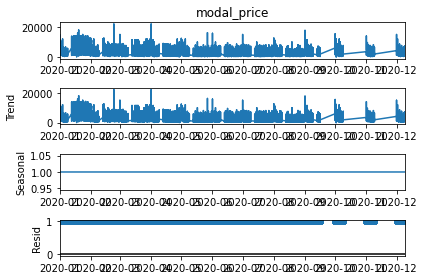

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import  seasonal_decompose

decompose_result = seasonal_decompose(df_clean["modal_price"], 
                                      model="multiplicative", period=1)
decompose_result.plot()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

modal_price = df_clean["modal_price"].values
modal_price_train, modal_price_test = train_test_split(modal_price, test_size=0.2, shuffle=32, random_state=32 )

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size +1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

In [ ]:
import tensorflow as tf

train_set = windowed_dataset(modal_price_train, window_size=60, batch_size=100, shuffle_buffer=1000)
test_set = windowed_dataset(modal_price_test, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(60, return_sequences=True),
    tf.keras.layers.LSTM(120),
    tf.keras.layers.Dense(60, activation="relu"),
    tf.keras.layers.Dense(60, activation="relu"),
    tf.keras.layers.Dense(120, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
df_clean.head()

,modal_price
arrival_date,
2020-01-01,3750.0
2020-01-01,7700.0
2020-01-01,600.0
2020-01-01,3800.0
2020-01-01,7000.0


In [ ]:
minMae = (df_clean['modal_price'].max() - df_clean['modal_price'].min()) * 10/100

In [ ]:
print(minMae)

2198.0


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("mae") < minMae ):
      print("\nmae lebih rendah dari skala data")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history = model.fit(train_set, epochs=10, validation_data=(test_set), callbacks=[callbacks])

Epoch 1/10
    858/Unknown - 191s 217ms/step - loss: 986.1959 - mae: 986.6962
mae lebih rendah dari skala data
858/858 [==============================] - 209s 239ms/step - loss: 986.1959 - mae: 986.6962 - val_loss: 978.7104 - val_mae: 979.2012


In [ ]:
history.history["mae"]

[986.6962280273438]

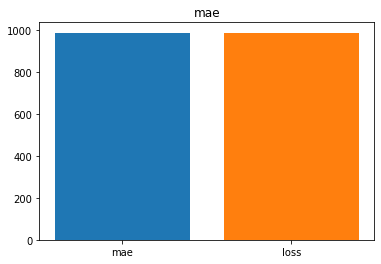

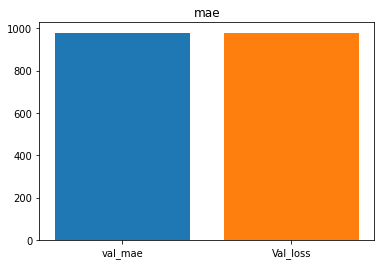

In [ ]:
plt.bar(x="mae" , height=history.history["mae"], )
plt.bar(x="loss", height=history.history["loss"])
plt.title("mae")
plt.show()

plt.bar(x="val_mae" , height=history.history["val_mae"], )
plt.bar(x="Val_loss", height=history.history["val_loss"])
plt.title("mae")
plt.show()

In [ ]:
save_path = "/content/myModel"
tf.saved_model.save(model, save_path)